In [1]:
# 월요일부터 딥러닝(텐서플로)
# 화요일 CNN + 팀원 확정
# 수요일 팀원끼리 회의실에서 프로젝트 진행
# 금요일 RNN, YOLO
# 7월 첫째주도 과정에 없는 내용인 파인튜닝 공부 진행(기술적 난이도가 조금 높음)
# 파인튜닝은 GPT, BERT 파인튜닝을 할 것임

In [2]:
# 8월 16일에 최종산출물 업로드가 끝나야함
# 외부 심사위원이 와서 심사를 해줄 것임

https://github.com/lsjsj92/recommender_system_with_Python/blob/master/004.%20recommender%20system%20basic%20with%20Python%20-%203%20Matrix%20Factorization.ipynb
위 코드 참고할 것

In [3]:
import pandas as pd
import numpy as np

In [4]:
rating_data=pd.read_csv("movies/ratings.csv")
movie_data=pd.read_csv("movies/movies.csv")
rating_data.drop('timestamp', axis = 1, inplace = True)
movie_data.drop('genres', axis = 1, inplace = True)
rating_data.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [5]:
movie_data.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
df_user_movie_ratings = rating_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
df_user_movie_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# matrix = df_user_movie_ratings.as_matrix() 기존엔 이거였는데 에러 나는듯
matrix = df_user_movie_ratings.to_numpy() # values를 사용해도 무관함. 배열로 변경하기 때문임
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [8]:
user_ratings_mean = np.mean(matrix, axis = 1)
user_ratings_mean.shape

(671,)

In [9]:
matrix_user_mean = matrix - user_ratings_mean.reshape(-1,1)
matrix_user_mean # 각 사용자 각 영화에 대한 평점 - 사용자 평점 평균 뺀 점수

array([[-0.00562541, -0.00562541, -0.00562541, ..., -0.00562541,
        -0.00562541, -0.00562541],
       [-0.02923009, -0.02923009, -0.02923009, ..., -0.02923009,
        -0.02923009, -0.02923009],
       [-0.02007501, -0.02007501, -0.02007501, ..., -0.02007501,
        -0.02007501, -0.02007501],
       ...,
       [-0.01367748, -0.01367748, -0.01367748, ..., -0.01367748,
        -0.01367748, -0.01367748],
       [ 3.98698434, -0.01301566, -0.01301566, ..., -0.01301566,
        -0.01301566, -0.01301566],
       [ 4.95030885, -0.04969115, -0.04969115, ..., -0.04969115,
        -0.04969115, -0.04969115]])

In [10]:
pd.DataFrame(matrix_user_mean, columns = df_user_movie_ratings.columns).head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,...,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625
1,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,3.970770,...,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230
2,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,...,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075
3,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,3.902162,...,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838
4,-0.043128,-0.043128,3.956872,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,...,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128


In [11]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

In [12]:
user_movie_data = pd.merge(rating_data, movie_data, on = 'movieId')
print(user_movie_data.shape)
user_movie_data.head()

(100004, 4)


,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [13]:
user_movie_rating = user_movie_data.pivot_table('rating', index = 'userId', columns='title').fillna(0)
user_movie_data.head()

,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [14]:
user_movie_data.T

,0,1,2,3,4,5,6,7,8,9,...,99994,99995,99996,99997,99998,99999,100000,100001,100002,100003
userId,1,7,31,32,36,39,73,88,96,110,...,663,663,663,663,664,664,664,665,665,668
movieId,31,31,31,31,31,31,31,31,31,31,...,134528,134783,137595,138204,60832,64997,72380,129,4736,6425
rating,2.5,3.0,4.0,4.0,3.0,3.0,3.5,3.0,2.5,4.0,...,3.5,3.0,3.0,3.5,3.0,2.5,3.5,3.0,1.0,1.0
title,Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),...,Aloha (2015),Entourage (2015),Magic Mike XXL (2015),7 Days in Hell (2015),Pathology (2008),War of the Worlds (2005),"Box, The (2009)",Pie in the Sky (1996),Summer Catch (2001),"6th Man, The (Sixth Man, The) (1997)"


In [15]:
movie_user_rating = user_movie_rating.values.T
movie_user_rating.shape

(9064, 671)

In [16]:
movie_user_rating

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
#                        A     =           U     @  sigma  @  V   
# SVD(특이값 분해) : m * n 행렬 => 분해 => m*m행렬 @ m*n행렬 @ n*n행렬 => m * n 행렬
# 행렬 U, V의 열벡터는 특이벡터(singular vector)라고 함
# 행렬 sigma는 대각행렬(대각 요소를 제외한 나머지 요소값이 모두 0)이며, 대각 요소값을 행렬 A의 특이값이라고 함

# sklearn의 truncatedSVD를 이용하여 sigma행렬 대각원소(특이값) 가운데 상위 n개를 추출할 수 있음

# ex) 9064편의 영화, 671명의 사용자
# 내가 재밌게 본 영화와 유사한 영화를 추천
# 671차원 -> 10차원 : 각각의 영화에 대한 671명의 평가점수가 10개의 feature 값으로 압축

In [18]:
svd = TruncatedSVD(n_components=10)

In [19]:
mat = svd.fit_transform(movie_user_rating) # 671차원 -> 10차원 
mat.shape # 차원축소된 형태

(9064, 10)

In [20]:
mat[0] # "Great Performances" Cats (1998)에 대한 671명의 평가 점수를 100개의 잠재요인 값으로 압축

array([ 0.01227491,  0.00250788,  0.01554509, -0.03396025, -0.01448402,
        0.00388145, -0.00261147,  0.04532933, -0.01518101, -0.02192033])

- 선형대수 공부하기 적합함
- https://angeloyeo.github.io/
- https://angeloyeo.github.io/2020/09/07/basic_vector_operation.html 벡터

In [21]:
corr = np.corrcoef(mat) # 피어슨 상관계수 구하기
corr.shape

(9064, 9064)

In [22]:
corr[0] # 첫번째 영화와 다른 영화의 상관관계

# 9064편의 영화에 대한 671명의 평가 점수 행렬이 주어지고,
# 각각의 영화에 대한 671명의 평가 점수를 10개의 특성값으로 압축해서 표현
# => 9064 * 10 행렬이 나오게 됨 => 9064편 영화들에 대한 10개의 특성값으로 피어슨 상관계수를 구함
# => 9064 * 9064 상관계수 행렬이 구해짐
# ex)
# corr[0] 행 전체를 출력했을 때, 자신을 제외한 나머지 상관계수 중에서 최대값에 해당하는 index를 추출하여
# corr[0]에 해당하는 영화와 가장 유사한 영화 제목을 출력

array([ 1.        ,  0.35308599, -0.02357732, ...,  0.44611838,
        0.02476213,  0.16310175])

In [23]:
# 결국 위에서 구한 것들은 상관계수를 구하게 되므로 분산값도 작은 값으로 채택됨
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
movie_title_list

['"Great Performances" Cats (1998)',
 '$9.99 (2008)',
 "'Hellboy': The Seeds of Creation (2004)",
 "'Neath the Arizona Skies (1934)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)',
 '...And God Spoke (1993)',
 '...And Justice for All (1979)',
 '1-900 (06) (1994)',
 '10 (1979)',
 '10 Attitudes (2001)',
 '10 Cloverfield Lane (2016)',
 '10 Items or Less (2006)',
 '10 Things I Hate About You (1999)',
 '10 Years (2011)',
 '10,000 BC (2008)',
 '100 Girls (2000)',
 '100 Rifles (1969)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '101 Reykjavik (101 Reykjavík) (2000)',
 '102 Dalmatians (2000)',
 '10th Kingdom, The (2000)',
 '11\'09"01 - September 11 (2002)',
 '11:14 (2003)',
 '12 Angry Men (1957)',
 '12 Angry Men (1997)',
 '12 Years a Slave (2013)',
 '127 Hours (2010)',
 '12:08 East of Bucharest (A fost sa

In [24]:
coffey_hands = movie_title_list.index("Guardians of the Galaxy (2014)")
coffey_hands

3405

In [25]:
corr[coffey_hands] # 상관계수가 0.9이상인 모든 영화의 제목을 출력

array([0.06266036, 0.26481218, 0.13566534, ..., 0.16072059, 0.35613057,
       0.87829681])

In [26]:
corr_df = pd.DataFrame(corr)
corr_df[corr_df[coffey_hands] >= 0.9].index
pd.DataFrame(movie_title_list).iloc[corr_df[corr_df[coffey_hands] >= 0.9].index].values
# 이것도 맞긴 함. 근데 코드가 너무 긺

array([['10,000 BC (2008)'],
       ['16 Blocks (2006)'],
       ['2 Guns (2013)'],
       ['2012 (2009)'],
       ['21 (2008)'],
       ['21 Jump Street (2012)'],
       ['22 Jump Street (2014)'],
       ['30 Minutes or Less (2011)'],
       ['300 (2007)'],
       ['300: Rise of an Empire (2014)'],
       ['Abduction (2011)'],
       ['Adjustment Bureau, The (2011)'],
       ['Adventures of Tintin, The (2011)'],
       ['Alice in Wonderland (2010)'],
       ['Amazing Spider-Man, The (2012)'],
       ['Angels & Demons (2009)'],
       ['Ant-Man (2015)'],
       ['Argo (2012)'],
       ['Avatar (2009)'],
       ['Avengers, The (2012)'],
       ['Avengers: Age of Ultron (2015)'],
       ['Bad Teacher (2011)'],
       ['Batman v Superman: Dawn of Justice (2016)'],
       ['Batman: The Dark Knight Returns, Part 1 (2012)'],
       ['Batman: The Dark Knight Returns, Part 2 (2013)'],
       ['Battle: Los Angeles (2011)'],
       ['Battleship (2012)'],
       ['Bee Movie (2007)'],
       ['Beo

In [27]:
list(movie_title[corr[coffey_hands]>=0.9]) # 이게 명답임

['10,000 BC (2008)',
 '16 Blocks (2006)',
 '2 Guns (2013)',
 '2012 (2009)',
 '21 (2008)',
 '21 Jump Street (2012)',
 '22 Jump Street (2014)',
 '30 Minutes or Less (2011)',
 '300 (2007)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adjustment Bureau, The (2011)',
 'Adventures of Tintin, The (2011)',
 'Alice in Wonderland (2010)',
 'Amazing Spider-Man, The (2012)',
 'Angels & Demons (2009)',
 'Ant-Man (2015)',
 'Argo (2012)',
 'Avatar (2009)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Bad Teacher (2011)',
 'Batman v Superman: Dawn of Justice (2016)',
 'Batman: The Dark Knight Returns, Part 1 (2012)',
 'Batman: The Dark Knight Returns, Part 2 (2013)',
 'Battle: Los Angeles (2011)',
 'Battleship (2012)',
 'Bee Movie (2007)',
 'Beowulf (2007)',
 'Best Offer, The (Migliore offerta, La) (2013)',
 'Big Hero 6 (2014)',
 'Blood Diamond (2006)',
 'Bolt (2008)',
 'Book of Eli, The (2010)',
 'Bourne Ultimatum, The (2007)',
 'Brave (2012)',
 'Bucket List, The (2007)'

In [28]:
# 수학책을 한다면 선형대수를 공부하면 됨. 근데 쉽게 설명되는 것을 사는 것이 좋음
# 개인차가 크기 때문에 어떤 것을 보라고 권하기는 어려움
# 교보문고가서 봐야하나;
# 연봉 많이 받는 방법ㅋ - 선형대수 및 확률통계를 많이 공부해둘 것

# 머신러닝의 다양한 알고리즘을 이용한 타이타닉 솔루션

https://www.linkedin.com/pulse/titanic-survivors-prediction-machine-learning-anant-agarwal/
타이타닉 코드 참고용

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.describe(include='O')
# top은 최빈값의 문자열을 의미함

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# 학습, 테스트 데이터 총합 = 891+418=1309
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

In [35]:
print("생존율 : %.1f%%" % (len(survived)/len(train)*100))

생존율 : 38.4%


In [36]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [37]:
# 문제: pclass를 기준으로 생존자의 수를 출력
# pclass와 survived 열에 대해 pclass를 기준으로 그룹화를 한 다음 생존율의 평균을 출력
# train[train['Survived']==1]['Pclass'].value_counts()
train.groupby('Pclass')['Survived'].sum()
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [38]:
train.groupby('Pclass').Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [39]:
train[['Pclass', 'Survived']].groupby(['Pclass'])
# train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()  # pclass를 열인덱스로 변경

<Axes: xlabel='Pclass', ylabel='Survived'>

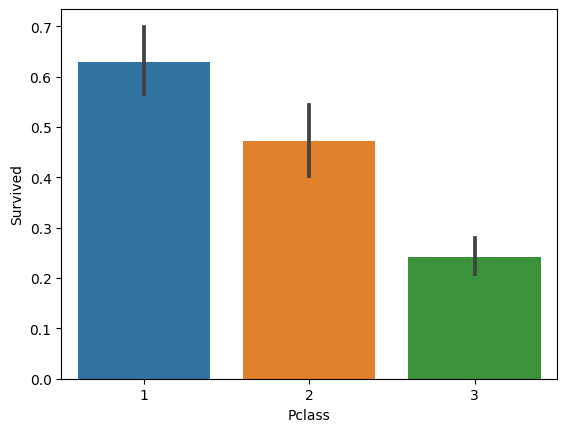

In [40]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [41]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [42]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [43]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [44]:
# 이제 시각화는 태블로를 이용하면 좋음
# matplotlib나 plotly, seaborn 등을 이용하는 것보다 태블로를 익혀서 하는 게 좋음

<Axes: xlabel='Sex', ylabel='Survived'>

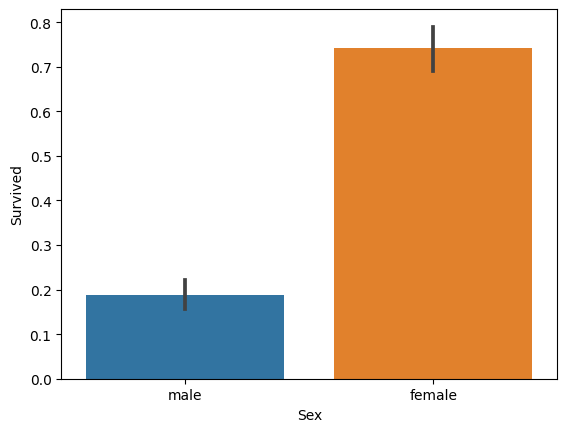

In [45]:
sns.barplot(x='Sex', y='Survived', data=train)

In [46]:
pd.crosstab(train['Pclass'], train['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

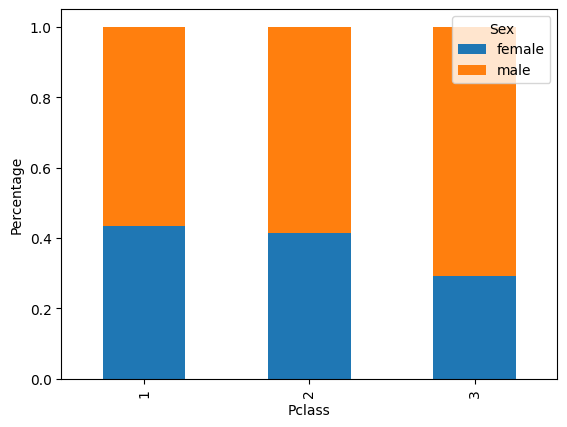

In [47]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

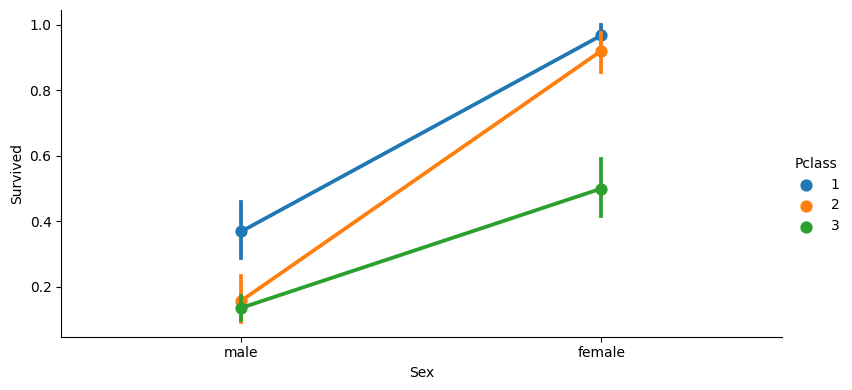

In [48]:
# sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)
# sns.catplot(x='Sex', y='Survived', hue='Pclass', size=4, aspect=2, data=train) # 이건 아니라고 하심;
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind='point', height=4, aspect=2, data=train) # 아마 이거인듯;

In [49]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [51]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='Embarked', ylabel='Survived'>

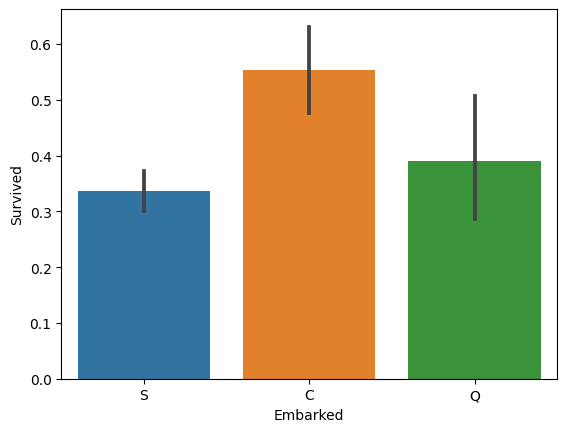

In [52]:
sns.barplot(x='Embarked', y='Survived', data=train)

In [53]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [54]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
# parch가 0인건 부모자식이 없다는 의미임. sibsp(형제)와는 다름
# parch가 1,2,3인 경우가 많이 생존했음..ㅠㅠ 대가족은 거의 전멸

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [55]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [56]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [57]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Axes: xlabel='Sex', ylabel='Age'>

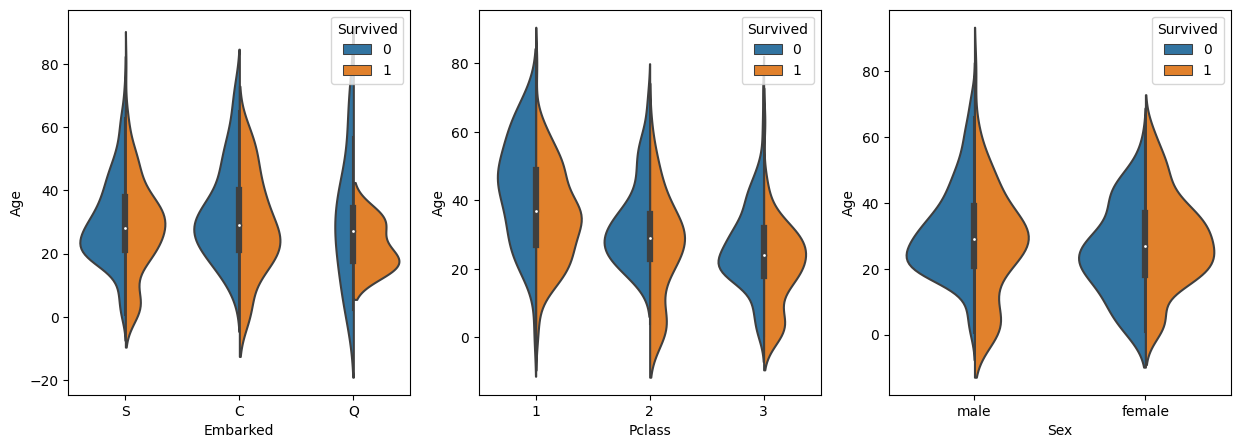

In [58]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

In [59]:
# train.drop('PassengerId',axis=1)
train.drop('PassengerId',axis=1).corr()

C:\Users\fkfma\AppData\Local\Temp\ipykernel_12620\3779867149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.drop('PassengerId',axis=1).corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [60]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [61]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [62]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [63]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [64]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [65]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [66]:
train.Embarked.value_counts() # S가 많으니 전부 S로 채우기

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [69]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


In [71]:
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
 2                               Heikkinen, Miss. Laina    1  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
 4                             Allen, Mr. William Henry    0  35.0      0   
 ..                                                 ...  ...   ...  

In [72]:
for dataset in train_test_data:
    age_avg = dataset.Age.mean()
    age_std = dataset.Age.std()
    age_null_count = dataset.Age.isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

C:\Users\fkfma\AppData\Local\Temp\ipykernel_12620\2858502010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
 12  Title        891 non-null    int64  
dtypes: float64(1), int32(3), int64(6), object(3)
memory usage: 80.2+ KB


In [75]:
train['AgeBand'] = pd.cut(train['Age'], 5)

In [76]:
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.517857
1   (16.0, 32.0]  0.355056
2   (32.0, 48.0]  0.374016
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [77]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [78]:
# 여기서 데이터 분석가의 주의점이 있음. 바로 고정관념을 깨야됨

In [79]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [80]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print(train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [81]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


In [83]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [ ]:
# 위 내용을 보면 5명 이상의 가구원일때 생존율이 급격히 떨어짐.
# 가구가 너무 적어서 저렇게 보였을 수도 있음

In [84]:
for dataset in train_test_data: # 가족 수가 1이면 혼자라는 열을 생성하고 1로 설정
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()) # 혼자 탑승한 경우보다 생존율이 높음

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [85]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']

In [86]:
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [87]:
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [88]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


In [89]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [90]:
X_test = test.drop("PassengerId", axis=1).copy()

In [91]:
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

# 로지스틱

In [93]:
# 모델 사용
from sklearn.linear_model import LogisticRegression

In [94]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)

In [95]:
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print(str(acc_log_reg) + ' percent')

80.7 percent


In [98]:
# y_pred_log_reg 캐글에 제출 -> 점수, 랭크, 소스코드 채팅창으로 전송
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_log_reg
    })
submission.to_csv('submission_logistic.csv', index=False) # 0.77272

# SVM

In [100]:
from sklearn.svm import SVC, LinearSVC

In [101]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print(acc_svc)

83.16


In [103]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_svc
    })
submission.to_csv('submission_svc1.csv', index=False) 
# 0.78468 이것은 랜덤 추출같은 요소가 있으므로 다른 점수가 나올 수 있음. 순위는 2260위 

# KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

84.96


In [106]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_knn
    })
submission.to_csv('submission_knnn.csv', index=False) 
# 0.76315 이건 오히려 점수가 떨어짐

# 의사결정 트리, 랜덤포레스트

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [108]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

86.98


In [109]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_decision_tree
    })
submission.to_csv('submission_decision_tree.csv', index=False) 
# 0.76076 점수가 다소 낮음

In [110]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

86.98


In [111]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_random_forest
    })
submission.to_csv('submission_random_forest.csv', index=False)  # 0.76555

# 나이브베이즈

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

77.55


In [114]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_gnb
    })
submission.to_csv('submission_gnb.csv', index=False)  # 0.73684

In [ ]:
# 금일 해야될 것

# 행렬분해 때 몇 차원으로 줄일 것인지 수정해볼 필요가 있음(현재는 10차원으로 줄였던 것을 의미하는 것임)
# = 차원축소 해보고 결과 비교

# 타이타닉 처리 및 모델링 시 하이퍼 파라미터 다양하게 설정
# = 정확도 개선(성적 올리기)

# LGBM
개인적으로 시도해봄

In [115]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)

In [116]:
# 하이퍼 파라미터
params = { 
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 20,
    'learning_rate': 0.02,
    'bagging_fraction': 0.8,
}

In [117]:
epoch = 100
lgbm_model = lgb.train(params, train_data, epoch) # 학습

In [120]:
y_pred_lgb = lgbm_model.predict(X_test)
y_pred_lgb = [1 if x>=0.5 else 0 for x in y_pred_lgb]

In [121]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_lgb
    })
submission.to_csv('submission_lgb.csv', index=False)  # 0.77751

In [ ]:
submission_svc1.csv SVM
Complete · 32m ago
0.78468

submission_lgb.csv LBGM
Complete · now
0.77751

submission_logistic.csv  로지스틱
Complete · 37m ago
0.77272

submission_random_forest.csv 랜덤포레스트
Complete · 24m ago
0.76555






submission_knnn.csv KNN
Complete · 29m ago
0.76315

submission_decision_tree.csv 의사결정 트리
Complete · 26m ago
0.76076

submission_gnb.csv 나이브베이즈
Complete · 22m ago
0.73684